In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos algunos agoritmos de clasificacion:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [48]:
# Una forma para evaluar el modelo
from sklearn.metrics import accuracy_score

In [4]:
# Obtencion de datos

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Borramos la columnaPassengerId
df.drop('PassengerId', axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
len(df)

891

In [12]:
df.shape

(891, 12)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Comprobamos cuantas columnas hay con vaores null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
# nan seria lo equivalente a null

for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.Survived.value_counts() # Cuanta gente sobrevive

Survived
0    549
1    342
Name: count, dtype: int64

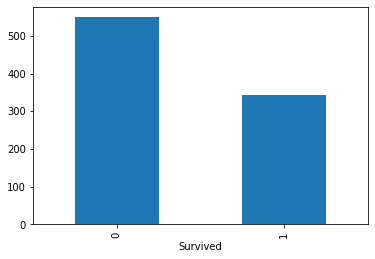

In [19]:
df.Survived.value_counts().plot(kind="bar") # Lo mismo pero con graficos :)
plt.show()

In [20]:
# Forma 1 de seleccionar informacion concreta
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
# Forma 2
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
# Forma 3
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


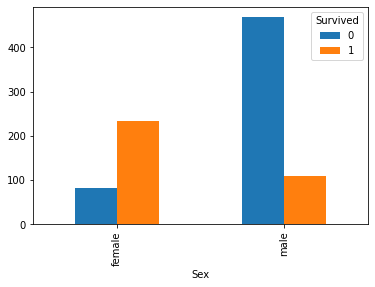

In [23]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar") 
#Apunte: 0 es false y 1 es true por lo tanto podemos deducir que la mayoria de los hombres no sobrevivieron
plt.show()

In [24]:
pd.crosstab(df.Pclass, df.Survived) # Podemos ver que la gente con dinero tiene mas posibiidades de sobrevivir

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


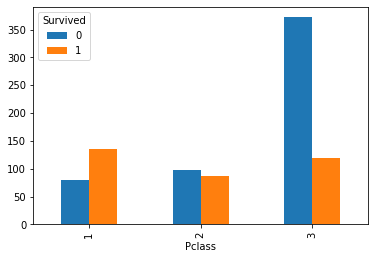

In [25]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar")
plt.show()

In [26]:
# Forma 5
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

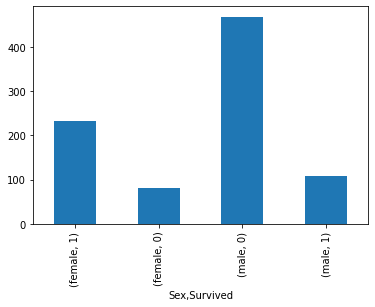

In [27]:
df.groupby("Sex").Survived.value_counts().plot(kind="bar")
plt.show()

In [28]:
# Forma 6
# Seleccionamos las filas donde la PClass es 1, el dataframe mantiene su forma
df_sex_uno = df[df.Pclass==1]
df_sex_uno.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [29]:
# Se puede seleccionar sobre el nuevo dataframe:
df_sex_uno_crosstab = df[df.Pclass==1]["Survived"]
df_sex_uno_crosstab

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [30]:
# Otros ejemplos de creacion de dataframes concretos
# Obtenemos todos los que sobreviven
df_sobreviven_todos = df[df['Survived']==1]
# Los que no sobrevivien
df_sobreviven_ninguno = df[df['Survived']==0]
# Hombres que sobreviven
df_hombres_supervivientes = df[(df['Survived']==0) & (df['Sex']=='male')]
# Mujeres que sobreviven
df_mujeres_supervivientes = df[(df['Survived']==0) & (df['Sex']=='female')]

In [32]:
df_sobreviven_todos.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [33]:
df_sobreviven_todos.Survived.value_counts(3)

Survived
1    1.0
Name: proportion, dtype: float64

In [34]:
df_sobreviven_ninguno.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [35]:
df_hombres_supervivientes.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [37]:
df_mujeres_supervivientes.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [55]:
# Graficos: funciones para obtener graficas de forma automatica
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


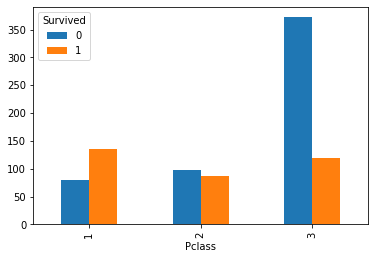

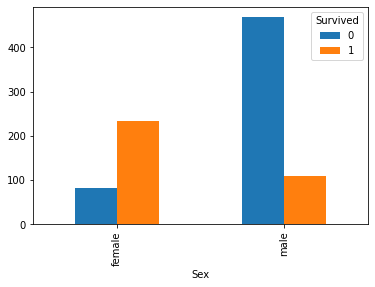

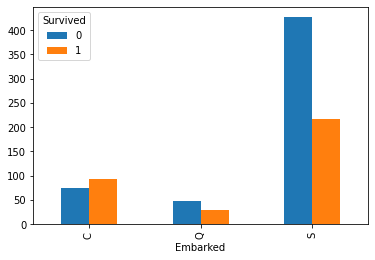

In [39]:
opciones = ["Pclass", "Sex", "Embarked"]

for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind="bar")
    plt.show()

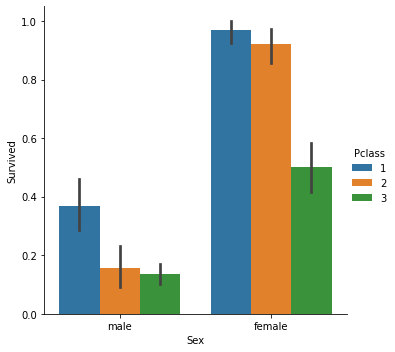

In [60]:
# Graficos en seaborn
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='bar', data=df)
plt.show()

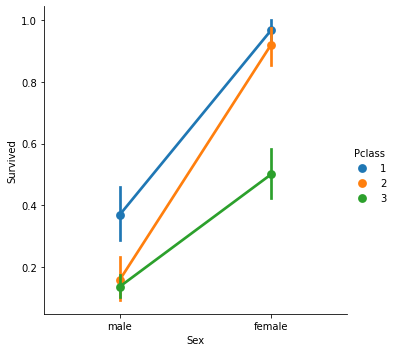

In [63]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="point", data=df)
plt.show()

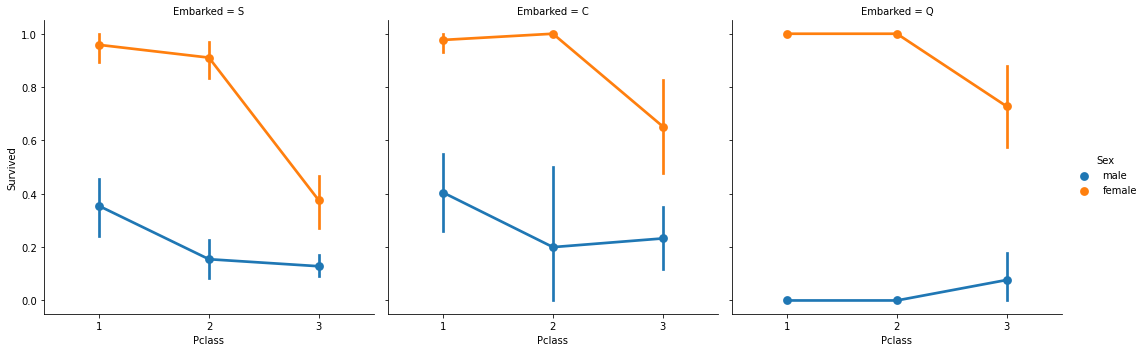

In [64]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind="point", data=df)
plt.show()

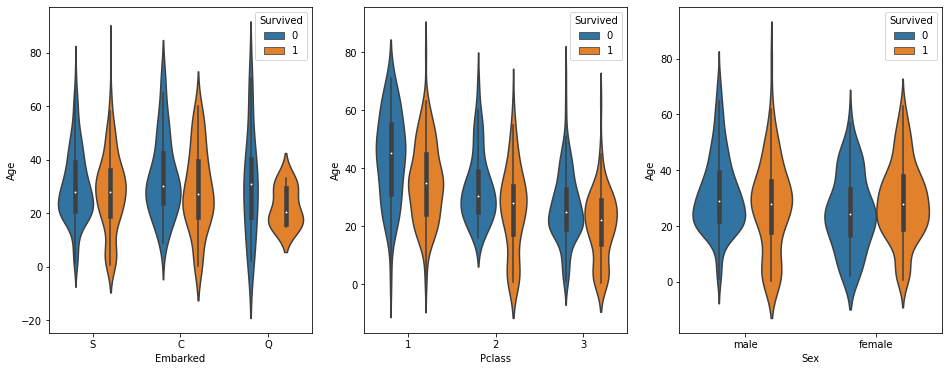

In [68]:
# Plots por edad y supervivencia
# Creamos la figura
fig = plt.figure(figsize=(16,6))
# creamos los tres subplots:
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, ax=ax3)

plt.show()

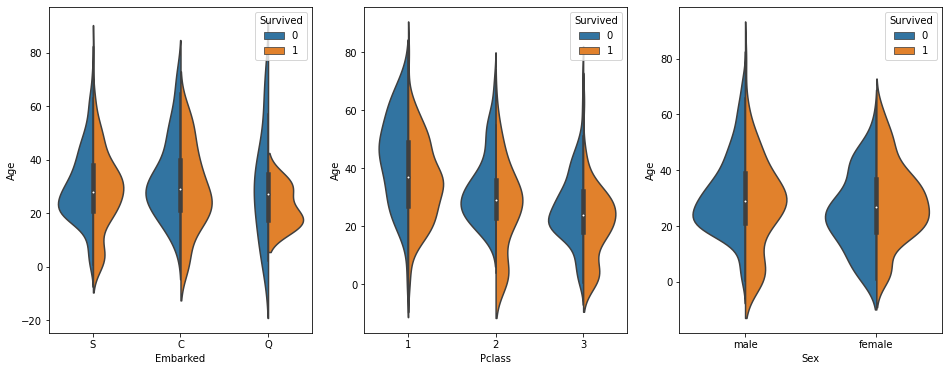

In [70]:
fig = plt.figure(figsize=(16,6))
# creamos los tres subplots:
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", split=True, data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True,data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", split=True,data=df, ax=ax3)

plt.show()

In [71]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

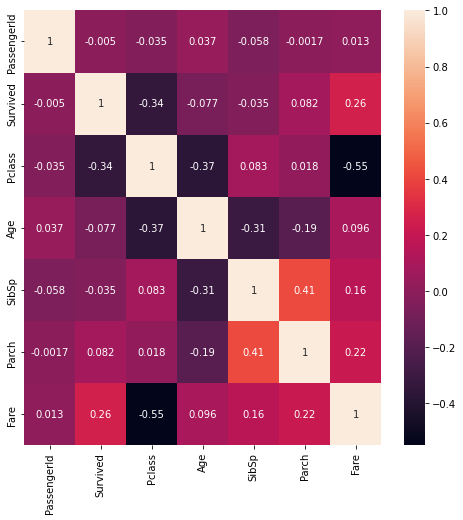

In [76]:
plt.figure(figsize=(8,8))
# Obtenia un error sin filtrar unicamente por las columnas con valor numerico
numerical_columns = df.select_dtypes(include=['float64', 'int64']) 
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

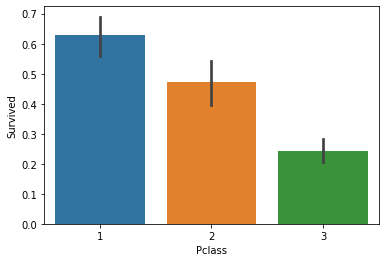

In [77]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

In [80]:
def funcion_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind="bar")
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,2)
    sns.barplot(x=feat, y="Survived", data=df)
    plt.show()

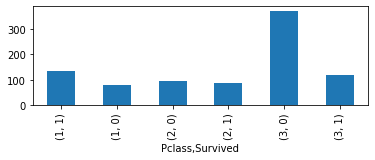

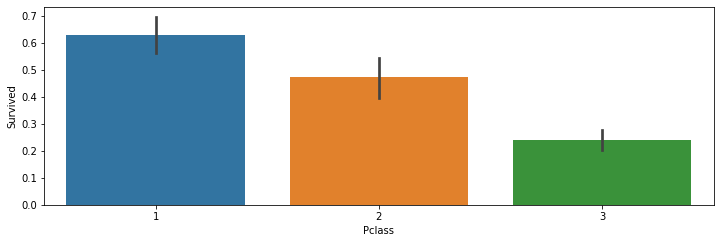

In [81]:
funcion_graficas("Pclass")

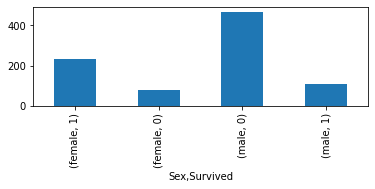

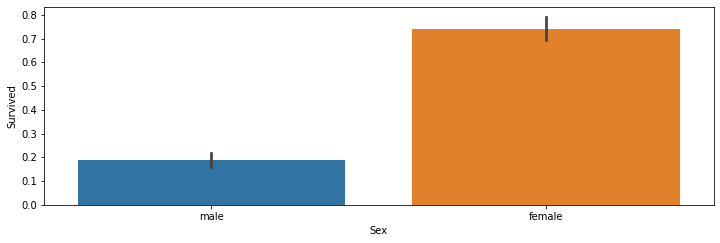

In [82]:
funcion_graficas("Sex")

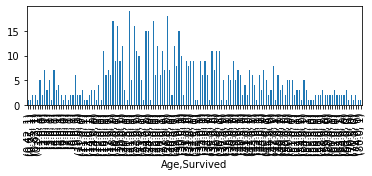

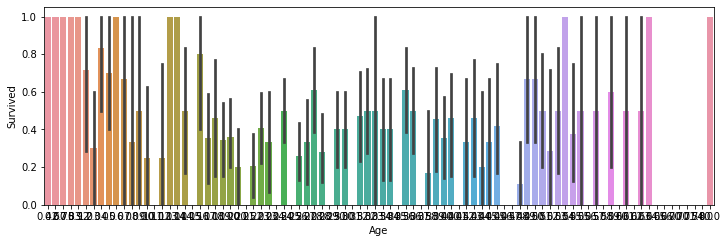

In [83]:
funcion_graficas("Age")

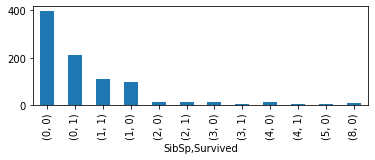

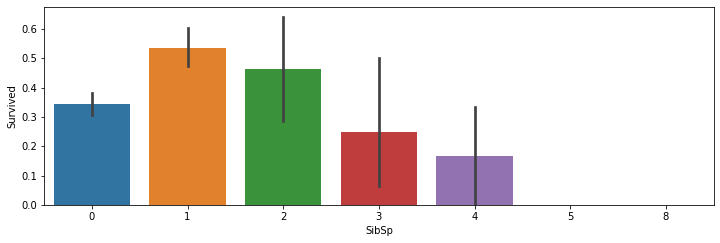

In [84]:
funcion_graficas("SibSp")

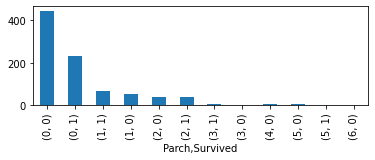

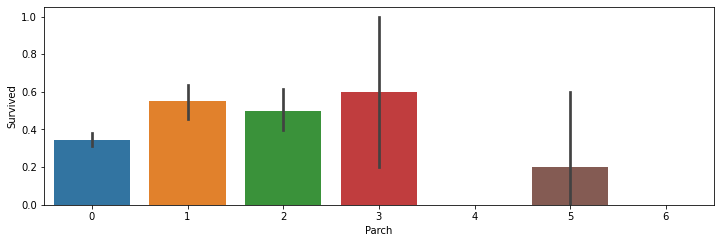

In [85]:
funcion_graficas("Parch")

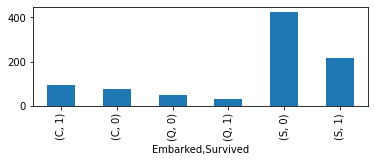

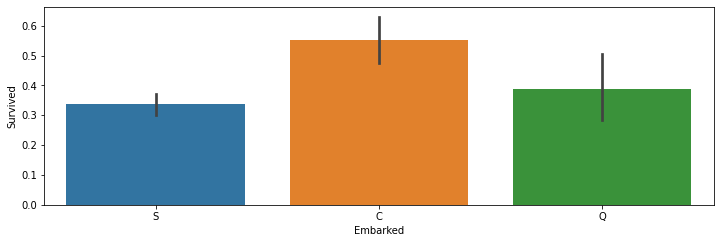

In [86]:
funcion_graficas("Embarked")

# Segunda parte de la actividad

Pregunta 1
Si estás trabajando con un set de datos, y necesitas ver rápidamente la información de una columna con un gráfico. ¿Qué librería usarías? ¿Por qué? Si quieres puedes añadir un ejemplo. No es necesario, no obstante.

Utlizaria Matplotlib como hemos hecho en varios de los ejemplos de la leccion y si quisiera obtener algun tipo de grafico en base a la informacion de la columna podría utilizar seaborn.

Un buen ejemplo seria el siguiente:

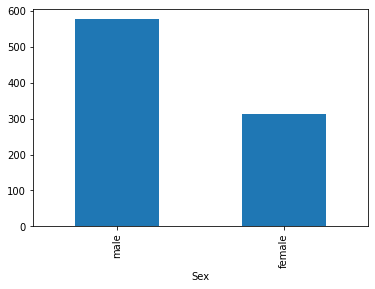

In [5]:
df.Sex.value_counts().plot(kind="bar") # Lo mismo pero con graficos :)
plt.show()

Pregunta 2:
¿Te parece difícil la forma en que creamos “nuevos DataFrames”? (seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o premisas).
Nota: Sobre esto hemos hablado en el punto 5 del Manual
(Esta parte será puntuada solamente por el mero hecho de responder a la misma, independientemente de lo que se diga).
Se trata de yo saber lo que habéis avanzado.
Esta materia, o algo muy similar, probablemente se explique nuevamente en asignaturas posteriores. (En Machine Learning, quizá).

No realmente, es muy intuitivo. Con un par de casos de ejemplo puedes practicamente extrapolarlo a un monton de opciones.

Pregunta -3-
Busca algo de información acerca de “Heatmap” y explica con tus palabras lo que consideres oportuno
Puedes añadir ejemplos o lo que quieras.

La definicion "oficial" podria ser la siguiente:

La función heatmap() en la biblioteca seaborn se utiliza para representar una matriz de datos en forma de mapa de calor. Un mapa de calor es una representación visual en la que los valores de la matriz se muestran como colores en una cuadrícula. Es una excelente manera de visualizar la relación y la distribución de los datos en una matriz.

Realmente puede llegar a ser una funcion muy util en diferentes casos de uso, pero tiene la limitacion de que, al menos a mi, no me dejó plotearlo si todos los datos no eran de tipo entero o decimal.

Segun tengo entendido se utiliza mucho en algunos sectores como los supermercados, en los cuales utilizan la informacion de los clientes para ver que zonas frecuentan mas y asi saber como distribuir los productos en los que tienen mas interes en vender.

Pregunta -4-
Hemos usado diferentes tipos de gráficos.
¿Se entiende bien cuando usar un “violinplot” o un “factorplot” por ejemplo?
¿Serías capaz de emplearlo en otro set de datos?
(Esta parte de la actividad será puntuada solamente por el mero hecho de ser respondida, independientemente de lo que se diga).
Recuerda que existen más tipos de Gráficos, no obstante, y lo más importante es la “extracción de información” de los mismos.

El factorplot si que me resulta bastante legible e intuitivo, pero realmente a nivel personal no acabo de verle demasiada utilidad al violinplot, no me parece nada intuitivo de primeras y creo que puede haber otras opciones mejores.